<a href="https://colab.research.google.com/github/J0han-ai/fast.ai/blob/main/%D0%BF%D1%82%D0%B8%D1%86%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/Joeclinton1/google-images-download.git


  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-80u_t38j
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-80u_t38j
     |████████████████████████████████| 911kB 9.5MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15945 sha256=dcf851181577ab44d123347dbd53964f2bdd074b1312d926551e6e19971fd5b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-yin2hd14/wheels/1a/36/c9/53bd827bc241b69fe47b90731625459627f82694ecd8a88273
Successfully built google-images-download


In [2]:
from google_images_download import google_images_download   #importing the library
 
response = google_images_download.googleimagesdownload()   #class instantiation
 
arguments = {"keywords":"синица,соловей,воробей","limit":100,"print_urls":True}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images



Item no.: 1 --> Item name = \u0441\u0438\u043d\u0438\u0446\u0430
Evaluating...
Starting Download...
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Parus_major_m.jpg/275px-Parus_major_m.jpg
Completed Image ====> 1.275px-parus_major_m.jpg
Image URL: https://na-zapade-mos.ru/files/data/user/AiF/olga.k/files/2020/2020.12.15-1608065685.4988_bolshaja-sinica.jpg
Completed Image ====> 2.2020.12.15-1608065685.4988_bolshaja-sinica.jpg
Image URL: https://cdn.download.ams.birds.cornell.edu/api/v1/asset/133732751/1800
Completed Image ====> 3.1800.jpg
Image URL: https://simple-fauna.ru/wp-content/uploads/2018/06/sinica.jpg
Completed Image ====> 4.sinica.jpg
Image URL: https://polit.ru/media/photolib/2019/12/28/ps_26194636951_a162f9e263_k_1577550205.jpg
Completed Image ====> 5.ps_26194636951_a162f9e263_k_1577550205.jpg
Image URL: https://krasivosti.pro/uploads/posts/2021-04/1618653964_50-krasivosti_pro-p-seraya-sinitsa-ptitsi-krasivo-foto-53.jpg
Completed Image ====> 6.16186539

In [3]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.3MB/s 
     |████████████████████████████████| 1.2MB 51.3MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 194kB 54.6MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
Mounted at /content/gdrive


In [4]:
from fastbook import *
from fastai.vision.widgets import *

In [5]:
search_images_bing

<function fastbook.search_images_bing>

In [6]:
birds_types = 'воробей','синица','соловей'
path = Path('birds')

In [7]:
!pip install --upgrade gupload

from pydrive.auth import GoogleAuth
from google.colab import auth

# Authenticate and create the PyDrive client.
auth.authenticate_user()

!gupload --to '1wNJUZtQD_6oBvvUhWRlAb0xjjjoLZQ' res.png

# if multiple images
# !gupload --to '1wNJUZtQD_6oBvvUhWRlAb0xjjjoLZQ' *.png

     |████████████████████████████████| 81kB 5.3MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
ERROR: earthengine-api 0.1.269 has requirement google-api-python-client<2,>=1.12.1, but you'll have google-api-python-client 1.7.10 which is incompatible.
  Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8
Usage: gupload [OPTIONS] [FILES]...
Try "gupload --help" for help.

Error: Invalid value for "[FILES]...": Could not open file: res.png: No such file or directory


In [33]:
ls -l


total 22556
-rw-r--r-- 1 root root  240402 Jul  2 03:53  10.1618815713_57-krasivosti_pro-p-ptitsa-menshe-vorobya-ptitsi-krasivo-foto-62.jpg
-rw-r--r-- 1 root root   36203 Jul  2 03:53  11.4.0.jpg
-rw-r--r-- 1 root root   59627 Jul  2 03:53  12.vorobey-4.jpg
-rw-r--r-- 1 root root  160329 Jul  2 03:53  13.vorobi.jpg
-rw-r--r-- 1 root root  162683 Jul  2 03:53  14.1-4.jpg
-rw-r--r-- 1 root root   13737 Jul  2 03:53  15.depositphotos_20123049-stock-photo-sparrow.jpg
-rw-r--r-- 1 root root   26396 Jul  2 03:53  16.vorobi-544x370.jpg
-rw-r--r-- 1 root root  638367 Jul  2 03:53  17.dscf0654.jpg
-rw-r--r-- 1 root root   83123 Jul  2 03:53  18.vorobey.jpg
-rw-r--r-- 1 root root  172213 Jul  2 03:53  19.1618622773_61-krasivosti_pro-p-ptitsa-vorobei-ptitsi-krasivo-foto-63.jpg
-rw-r--r-- 1 root root   57430 Jul  2 03:53  1.sparrow.jpg
-rw-r--r-- 1 root root   16312 Jul  2 03:53  20.exren7j4_400x400.jpg
-rw-r--r-- 1 root root  261222 Jul  2 03:53  21.1200px-2005-2010._%d0%9f%d1%82%d0%b8%d1%86%d1%8

In [44]:
import zipfile
import os
print(os.getcwd())
 
print(os.getcwd()) # C:\\Python27
 



/content/downloads/воробей
/content/downloads/воробей


In [45]:
os.listdir()


['73.1618769889_36-krasivosti_pro-p-yaponskii-vorobei-ptitsi-krasivo-foto-41.jpg',
 '50.16815.jpg',
 '34.3_4.jpg',
 '9.2477569.jpg',
 '89.300px-%d0%94%d0%be%d0%bc%d0%be%d0%b2%d1%8b%d0%b9_%d0%b2%d0%be%d1%80%d0%be%d0%b1%d0%b5%d0%b9.jpg',
 '14.1-4.jpg',
 '85.dsc09599_modified.jpg',
 '48.iz-sevastopolya-ischezajut-vorobi-139290-37.jpg',
 '30.%d0%a1%d0%bb%d0%be%d0%b2%d0%b0%d1%80%d0%bd%d0%be%d0%b5-%d1%81%d0%bb%d0%be%d0%b2%d0%be-%d0%b2%d0%be%d1%80%d0%be%d0%b1%d0%b5%d0%b9-%d0%b2-%d0%bb%d0%b8%d1%82%d0%b5%d1%80%d0%b0%d1%82%d1%83.jpg',
 '28.hqdefault.jpg',
 '82.vorobey_domoviy.jpg',
 '11.4.0.jpg',
 '1.sparrow.jpg',
 '86.8517d2ccd51068a4efd751957b85a2e4_xl.jpg',
 '69.vorobej-prisposoblennost-k-srede-obitaniya.jpg',
 '42.sparrow-5709873_960_720.jpg',
 '41.24.jpg',
 '57..-12.-%d0%9f%d0%be%d0%bb%d0%b5%d0%b2%d0%be%d0%b9-%d0%b2%d0%be%d1%80%d0%be%d0%b1%d0%b5%d0%b9-%d0%ba%d0%be%d1%80%d0%bc%d0%b8%d1%82-%d1%81%d0%bb%d0%b5%d1%82%d0%ba%d0%b0-e1533727039788.jpg',
 '72.55-350x284.jpg',
 '76.vorobey_02.jpg',
 '

In [55]:
 #архивирование всех файлов в папке в один архив

 import zipfile
import os

path = '/content/downloads/синица'
file_dir = os.listdir(path)

with zipfile.ZipFile('синица.zip', mode='w', \
                     compression=zipfile.ZIP_DEFLATED) as zf:
    for file in file_dir:
        add_file = os.path.join(path, file)
        zf.write(add_file)

os.system('file test.zip')

32512

Проводим классификацию. Самый простой случай, бинар
ная классификация.Соловей это или же не соловей


In [57]:
#импортируем необходимые библиотеки

import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from tqdm import tqdm

%matplotlib inline

In [58]:
#определим устройство, где проводить вычисления (GPU или CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [68]:
# необходимо разпаковать датасет в окружение, делается это так:
import zipfile
with zipfile.ZipFile('/content/downloads/соловей.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/dataset/downloads/соловей')

In [69]:
#функция для вывода изображений
def image_shower(images, labels, n=4):
    plt.figure(figsize=(12, 12))
    for i, image in enumerate(images[:n]):
        plt.subplot(n, n, i + 1)
        image = image/ 2 + 0.5
        plt.imshow(image.numpy().transpose((1, 2, 0)).squeeze())
    print("Real Labels: ", ' '.join('%5s' % classes[label] for label in labels[:n]))
#имена классов
classes = ("соловей", "not_соловей")

#путь до датасета
PATH = "/content/dataset/downloads/соловей"

In [74]:
# распакуем тренировочную выборку для модели "соловей" - 80 процентов от общего
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/content/train/train.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/dataset/downloads/соловей/train')

In [77]:

#функция для вывода изображений
def image_shower(images, labels, n=4):
    plt.figure(figsize=(12, 12))
    for i, image in enumerate(images[:n]):
        plt.subplot(n, n, i + 1)
        image = image/ 2 + 0.5
        plt.imshow(image.numpy().transpose((1, 2, 0)).squeeze())
    print("Real Labels: ", ' '.join('%5s' % classes[label] for label in labels[:n]))
#имена классов
classes = ("соловей", "not_соловей")

#путь до датасета
PATH = "/content/dataset/downloads/соловей/"

In [79]:
# распакуем валидационную выборку для модели "соловей" - 20 процентов от общего
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/content/train/test.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/dataset/downloads/соловей/test')

In [80]:
# зададим какие преобразования необходимо сделать с каждым изображением
transform = transforms.Compose(
    [transforms.Resize((64,64)),  #изменим размер изображений
     transforms.ToTensor(),   #переведем в формат который необходим нейронной сети - тензор
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])]) # проведем нормализацию изображения

#загружаем тренировочный и тестовый датасеты
trainset = torchvision.datasets.ImageFolder(os.path.join(PATH, "train"), transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, num_workers=0, shuffle=True)

testset = torchvision.datasets.ImageFolder(os.path.join(PATH, "test"), transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, num_workers=0, shuffle=True)


Real Labels:  соловей соловей соловей соловей


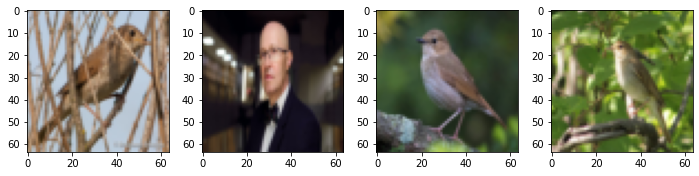

In [81]:
#Проверим как работает наш загрузчик и посмотрим на парочку изображений
images, labels = next(iter(trainloader))
image_shower(images, labels)